In [149]:
import numpy as np 
import matplotlib.pyplot as plt
import time

### Question 1

In [150]:
def create_matrix(mat:str, N:int=100):
    matrix = np.empty([N,N])
    if mat=='A':
        for i in range(1, N+1):
            for j in range(1, N+1):
                matrix[i-1][j-1] =  i*j/100
        return matrix
    elif mat=='B':
        for i in range(1, N+1):
            for j in range(1, N+1):
                matrix[i-1][j-1] =  ((i+1)*(j+1))/100
        return matrix


In [151]:
N = int(input("Enter N:"))
A = create_matrix('A',N)
B = create_matrix('B',N)

Enter N: 50


In [152]:
A, B

(array([[1.000e-02, 2.000e-02, 3.000e-02, ..., 4.800e-01, 4.900e-01,
         5.000e-01],
        [2.000e-02, 4.000e-02, 6.000e-02, ..., 9.600e-01, 9.800e-01,
         1.000e+00],
        [3.000e-02, 6.000e-02, 9.000e-02, ..., 1.440e+00, 1.470e+00,
         1.500e+00],
        ...,
        [4.800e-01, 9.600e-01, 1.440e+00, ..., 2.304e+01, 2.352e+01,
         2.400e+01],
        [4.900e-01, 9.800e-01, 1.470e+00, ..., 2.352e+01, 2.401e+01,
         2.450e+01],
        [5.000e-01, 1.000e+00, 1.500e+00, ..., 2.400e+01, 2.450e+01,
         2.500e+01]]),
 array([[ 0.04,  0.06,  0.08, ...,  0.98,  1.  ,  1.02],
        [ 0.06,  0.09,  0.12, ...,  1.47,  1.5 ,  1.53],
        [ 0.08,  0.12,  0.16, ...,  1.96,  2.  ,  2.04],
        ...,
        [ 0.98,  1.47,  1.96, ..., 24.01, 24.5 , 24.99],
        [ 1.  ,  1.5 ,  2.  , ..., 24.5 , 25.  , 25.5 ],
        [ 1.02,  1.53,  2.04, ..., 24.99, 25.5 , 26.01]]))

In [153]:
# matrix multiplication using for loop 
C1 = np.empty([N,N])
start = time.time()
for i in range(N):
    for j in range(N):
        C1[i][j] = np.sum(A[i]*B[j]) #multiplying each row of A with each column of B. Since B is symmetric, no transpose required 

end = time.time()
print(np.round(C1,3)) 
print("time taken:", end-start)

[[8.840000e+00 1.326000e+01 1.768000e+01 ... 2.165800e+02 2.210000e+02
  2.254200e+02]
 [1.768000e+01 2.652000e+01 3.536000e+01 ... 4.331600e+02 4.420000e+02
  4.508400e+02]
 [2.652000e+01 3.978000e+01 5.304000e+01 ... 6.497400e+02 6.630000e+02
  6.762600e+02]
 ...
 [4.243200e+02 6.364800e+02 8.486400e+02 ... 1.039584e+04 1.060800e+04
  1.082016e+04]
 [4.331600e+02 6.497400e+02 8.663200e+02 ... 1.061242e+04 1.082900e+04
  1.104558e+04]
 [4.420000e+02 6.630000e+02 8.840000e+02 ... 1.082900e+04 1.105000e+04
  1.127100e+04]]
time taken: 0.03445720672607422


In [154]:
# matrix multuplication using numpy.dot function 
start = time.time()
C2 = np.dot(A,B) 
end = time.time()
print(np.round(C2,3))
print("time taken:", end-start)

[[8.840000e+00 1.326000e+01 1.768000e+01 ... 2.165800e+02 2.210000e+02
  2.254200e+02]
 [1.768000e+01 2.652000e+01 3.536000e+01 ... 4.331600e+02 4.420000e+02
  4.508400e+02]
 [2.652000e+01 3.978000e+01 5.304000e+01 ... 6.497400e+02 6.630000e+02
  6.762600e+02]
 ...
 [4.243200e+02 6.364800e+02 8.486400e+02 ... 1.039584e+04 1.060800e+04
  1.082016e+04]
 [4.331600e+02 6.497400e+02 8.663200e+02 ... 1.061242e+04 1.082900e+04
  1.104558e+04]
 [4.420000e+02 6.630000e+02 8.840000e+02 ... 1.082900e+04 1.105000e+04
  1.127100e+04]]
time taken: 0.0


the numpy.dot function takes less time because it performs direct vector multiplication and we are multiplying every element and appending it to a third array manually 

### Question 2

In [155]:
# a)
def kinematics(i:int, x:np.array, t:np.array):
    v = (x[i+1] - x[i-1])/(t[i+1] - t[i-1])
    a = (2/(t[i+1] - t[i-1]))*(((x[i+1] - x[i])/(t[i+1] - t[i])) - ((x[i] - x[i-1])/(t[i] - t[i-1])))

    return v, a

In [156]:
# testing 
x = np.array([1, 4, 8, 12])
t = np.array([1, 2, 3, 4])

v1, a1 = kinematics(1, x, t)
v1, a1

(3.5, 1.0)

In [157]:
# b)
data=np.loadtxt(r"C:\Users\User\GPS_data.txt", skiprows=1)
t, x = data.T[0], data.T[1]
x,t

(array([10., 17., 18., 16., 19., 20., 18., 18., 18., 18., 18., 18., 17.,
        15., 14., 14.]),
 array([  0.,   5.,  10.,  12.,  15.,  20.,  25.,  30.,  35.,  40.,  50.,
         60.,  70.,  80.,  90., 100.]))

In [158]:
def test_kinematics(x, t):
    for i in range(1, len(x)-1):
        v,a = kinematics(i,x,t)
        print((v,a))

In [159]:
test_kinematics(x,t)

(0.8, -0.24)
(-0.14285714285714285, -0.3428571428571428)
(0.2, 0.8)
(0.5, -0.2)
(-0.1, -0.12000000000000002)
(-0.2, 0.08000000000000002)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(0.0, 0.0)
(-0.05, -0.010000000000000002)
(-0.15, -0.010000000000000002)
(-0.15, 0.010000000000000002)
(-0.05, 0.010000000000000002)


### Question 3

In [160]:
def count_pairs(dna, pair):
    sum = 0
    n = len(pair)
    for i in range(len(dna)-1):
        if pair[0]==dna[i]:
            if pair[0:n]==dna[i:i+n]: #checking each substring using slicing 
                sum+=1
    print(sum)
count_pairs("ACTGCTATCCATT", "AT")
count_pairs("ATCTTATCGAATC", "ATC")

2
3


### Question 4

In [161]:
data=np.loadtxt(r"C:\Users\User\planet_data.txt", skiprows=17)

In [162]:
T, a, r, m = data.T[0], data.T[1], data.T[2], data.T[3]

In [128]:
ratio = T**2/a**3
print(np.round(ratio,3)) 

[139510.019 168798.087 102745.817 ...  98848.188  94418.464  98811.962]


since data is given for different stars, kepler's law cannot be verified 

Text(0.5, 0, 'radius')

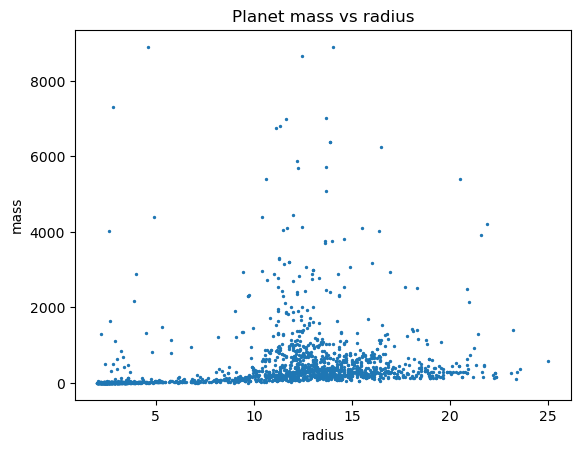

In [135]:
plt.scatter(r,m, s=2)
plt.title("Planet mass vs radius")
plt.ylabel("mass")
plt.xlabel("radius")